In [751]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [752]:
df = pd.read_excel("/home/sk-ji/Desktop/ANZ synthesised transaction dataset.xlsx")

## <font color=brown>Overview of data </font>

In [753]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


### <font color=teal >*checking shape of given data*  <br>*(12043 rows & 23 columns)* </font>

In [754]:
df.shape #23 columns and 12043 rows

(12043, 23)

### <font color=teal >*Overview about missing values and datatypes* <br> *(glimpse over dtypes and missing values)* </font>

In [755]:
df.info()  #it shows there are missing values are present

"""
missing values and data types information need to check more deeply
and make them more appropriate for better analysis

"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
status               12043 non-null object
card_present_flag    7717 non-null float64
bpay_biller_code     885 non-null object
account              12043 non-null object
currency             12043 non-null object
long_lat             12043 non-null object
txn_description      12043 non-null object
merchant_id          7717 non-null object
merchant_code        883 non-null float64
first_name           12043 non-null object
balance              12043 non-null float64
date                 12043 non-null datetime64[ns]
gender               12043 non-null object
age                  12043 non-null int64
merchant_suburb      7717 non-null object
merchant_state       7717 non-null object
extraction           12043 non-null object
amount               12043 non-null float64
transaction_id       12043 non-null object
country              12043 non-null object
customer_id          12043 n

'\nmissing values and data types information need to check more deeply\nand make them more appropriate for better analysis\n\n'

### <font color=teal >*checking datatypes more deeply* </font>

In [756]:
df.dtypes

status                       object
card_present_flag           float64
bpay_biller_code             object
account                      object
currency                     object
long_lat                     object
txn_description              object
merchant_id                  object
merchant_code               float64
first_name                   object
balance                     float64
date                 datetime64[ns]
gender                       object
age                           int64
merchant_suburb              object
merchant_state               object
extraction                   object
amount                      float64
transaction_id               object
country                      object
customer_id                  object
merchant_long_lat            object
movement                     object
dtype: object

# <font color=brown>**Variable types and thier data types needs to be observed:**</font>
####  -  <font color=teal >*Categorical Variable present in data are following:'status','txn_description','card_present_flag','movement','gender* <br>  <br>- *Variables which needs to convert from object to int/float in order to better pre-processing  as follows:* 'account','long_lat','merchant_long_lat','customer_id'* </font>

In [757]:
#removing AUC and CUS tag in account and coustomer id acolumn in order to convert them in numeric data
df.account = df.account.str.slice(4,)
df.customer_id = df.customer_id.str.slice(4,)

In [758]:
# in coulumn "long_lat" and "merchant_long_lat":- split of longitude and latitude
df['merchant long'] = df.merchant_long_lat.str.slice(0,7)
df['merchant lat'] = df.merchant_long_lat.str.slice(7,13)

df['long'] = df.long_lat.str.slice(0,6)
df['lat'] = df.long_lat.str.slice(7,13)


### <font color=teal >*conversion of datatypes (object to float)*</font>

In [759]:
try:
    df["account"] = df["account"].astype(float)                       #
    df["customer_id"] = df["customer_id"].astype(float)
    df["long"] = df["long"].astype(float)
    df["lat"] = df["lat"].astype(float)
    df["merchant lat"] = df["merchant lat"].astype(float)
#     df["mer long"] = df["mer long"].astype(float)
#     df["merchant_long_lat"] = df["merchant_long_lat"].astype(float)
#     df["long_lat"]= df["long_lat"].astype(float) 
except ValueError:
        print("value error on conversion")



### <font color=teal >*iterated through 'merchant long' column so that we can convert its element to float*</font>

In [760]:
a = []
for i in df['merchant long']:
    if type(i) == str and i[-1] == '-':
#         print(i[-1])
#         print(i)
        i = i.replace('-','')
#         print(i)
#         print(i,type(i))
        i = float(i)
#         print(type(i))
        

    elif type(i) == str and i[-3] == '-':
#         print(i)
        i = float(151)
#         print(i,type(i))
        
    elif type(i) == str:
        i = float(i)
#         print(type(i))

    a.append(i)

        
# df['merchant long'] = df['merchant long'].astype(float)

df['mer long'] = pd.DataFrame({'mer long':a})
# print(df['mer long'].dtypes)
df.head(30)

df['mer long'] = df['mer long'].astype(float)
        
        
        
        

In [761]:
df = df.drop(['merchant long'], axis = 1) #we have now new converted column "mer long" so dropping the "merchant long"


In [762]:
df.dtypes   #new converted data types (floats)

status                       object
card_present_flag           float64
bpay_biller_code             object
account                     float64
currency                     object
long_lat                     object
txn_description              object
merchant_id                  object
merchant_code               float64
first_name                   object
balance                     float64
date                 datetime64[ns]
gender                       object
age                           int64
merchant_suburb              object
merchant_state               object
extraction                   object
amount                      float64
transaction_id               object
country                      object
customer_id                 float64
merchant_long_lat            object
movement                     object
merchant lat                float64
long                        float64
lat                         float64
mer long                    float64
dtype: object

In [763]:
df.rename(columns = {'mer long':'merchant long'},inplace = True)  #for more convenience,"""renamed the column"""
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,merchant lat,long,lat,merchant long
0,authorized,1.0,NaN,1.598451e+09,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,2.487425e+09,153.38 -27.99,debit,-27.99,153.41,-27.95,153.38
1,authorized,0.0,NaN,1.598451e+09,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,2.487425e+09,151.21 -33.87,debit,-33.87,153.41,-27.95,151.21
2,authorized,1.0,NaN,1.222301e+09,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,2.142601e+09,151.21 -33.87,debit,-33.87,151.23,-33.94,151.21
3,authorized,1.0,NaN,1.037051e+09,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,1.614227e+09,153.05 -26.68,debit,-26.68,153.10,-27.66,153.05
4,authorized,1.0,NaN,1.598451e+09,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,2.487425e+09,153.44 -28.06,debit,-28.06,153.41,-27.95,153.44


In [764]:
df.dtypes

status                       object
card_present_flag           float64
bpay_biller_code             object
account                     float64
currency                     object
long_lat                     object
txn_description              object
merchant_id                  object
merchant_code               float64
first_name                   object
balance                     float64
date                 datetime64[ns]
gender                       object
age                           int64
merchant_suburb              object
merchant_state               object
extraction                   object
amount                      float64
transaction_id               object
country                      object
customer_id                 float64
merchant_long_lat            object
movement                     object
merchant lat                float64
long                        float64
lat                         float64
merchant long               float64
dtype: object

### <font color=teal >*treating categorical variables <br> implementing lable encoding if needed*</font>

In [615]:
# from sklearn.preprocessing import LabelEncoder
# le  = LabelEncoderel()
# le .fit_transform(df['gender','movement',])

### <font color=teal >*checking the details of transactions*</font> 


In [616]:
df['date'].min()

Timestamp('2018-08-01 00:00:00')

In [617]:
df['date'].max()

Timestamp('2018-10-31 00:00:00')

### <font color=teal> <em>Essential data month wise <br> As there are three months are given in data August,September,October </br></em> </font>

In [622]:
aug_data = df.loc[(df['date'] < '2018-09-01') & (df['date']>'2018-08-01'),['status','txn_description','date','amount','balance'] ]
sep_data = df.loc[(df['date'] < '2018-10-01') & (df['date']>'2018-08-31'),['status','txn_description','date','amount','balance'] ]
oct_data = df.loc[(df['date'] < '2018-11-01') & (df['date']>'2018-08-31'),['status','txn_description','date','amount','balance'] ]

In [765]:
# aug_data

# fig, ax = plt.subplots(figsize=(12,6))
# df['txn_description'].count()
# aug_data = df.loc[df['date'] < '2018-09-01',['status','txn_description'] ]
# aug_data.count()
# sns.countplot(data=aug_data,x='status',hue='txn_description')

Text(0.5, 1.0, 'August Data')

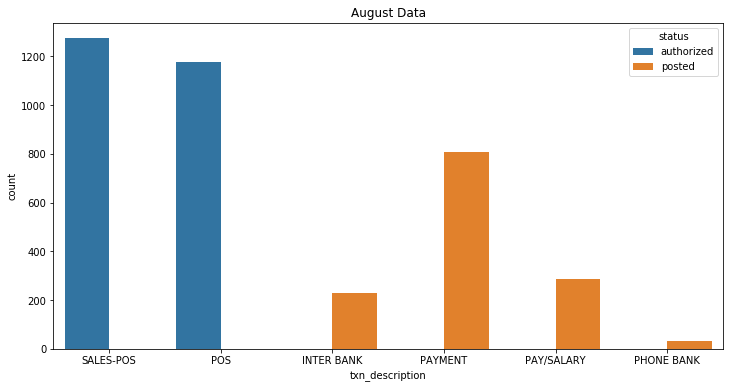

In [766]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x='txn_description',hue='status',data=aug_data,ax=ax).set_title("August Data")



Text(0.5, 1.0, 'September Data')

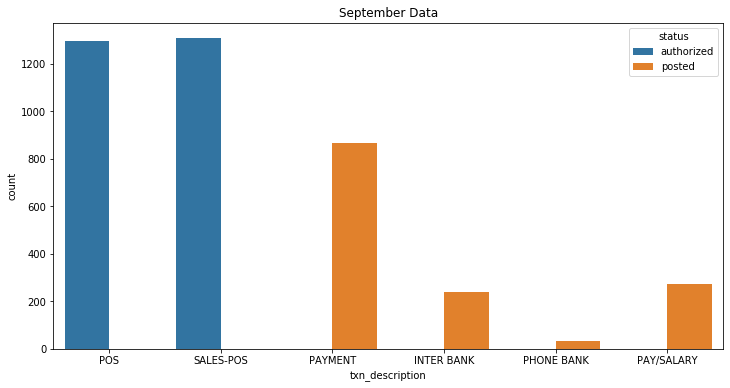

In [625]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x='txn_description',hue='status',data=sep_data,ax=ax).set_title("September Data")

Text(0.5, 1.0, 'October Data')

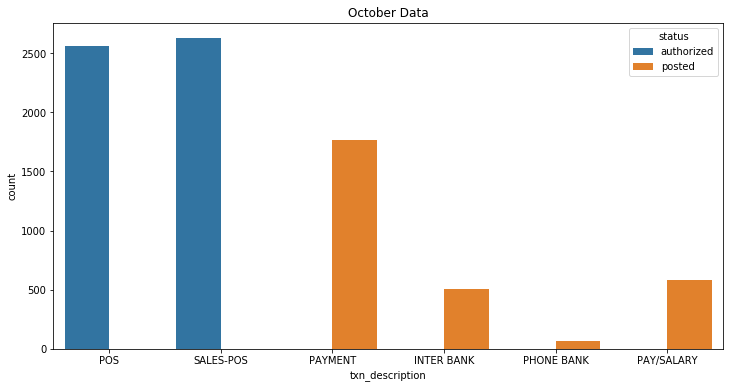

In [495]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x='txn_description',hue='status',data=oct_data,ax=ax).set_title("October Data")

### <font  color=orangered><em> the average transaction per month is: <br> August - 122 <br> September - 133 <br> October - 2616</em> </font>

In [632]:
oct_data['amount'].count()

8100

In [643]:
aug_avg_amt = aug_data['amount'].sum()/3806
sep_avg_amt = sep_data['amount'].sum()/4013
oct_avg_amt = oct_data['amount'].sum()/8100

aug_max_amt = aug_data['amount'].idxmax()
sep_max_amt = sep_data['amount'].idxmax()
oct_max_amt = oct_data['amount'].max()

aug_min_amt = aug_data['amount'].min()
sep_min_amt = sep_data['amount'].min()
oct_min_amt = oct_data['amount'].min()

print(aug_max_amt)
print(sep_max_amt)
print(oct_max_amt)

print(aug_min_amt)
print(sep_min_amt)
print(oct_min_amt)

print(aug_avg_amt)
print(sep_avg_amt)
print(oct_avg_amt)

2401
6529
8835.98
1.52
0.1
0.1
183.9378822911193
182.04590331422878
189.30230617283954


In [644]:
aug_avg_blc = aug_data['balance'].sum()/3806
sep_avg_blc = sep_data['balance'].sum()/4013
oct_avg_blc = oct_data['balance'].sum()/8100

aug_max_blc = aug_data['balance'].idxmax()
sep_max_blc = sep_data['balance'].idxmax()
oct_max_blc = oct_data['balance'].max()

aug_min_blc = aug_data['balance'].min()
sep_min_blc = sep_data['balance'].min()
oct_min_blc = oct_data['balance'].min()


print(aug_max_blc)
print(sep_max_blc)
print(oct_max_blc)


print(aug_min_blc)
print(sep_min_blc)
print(oct_min_blc)

print(aug_avg_blc)
print(sep_avg_blc)
print(oct_avg_blc)

2965
6708
267128.52
0.24
0.98
0.98
10825.111242774567
14730.151136307004
16607.56778271605


In [497]:
# average transaction in august
aug_avg_txn = aug_data['amount'].count()/31
sep_avg_txn = sep_data['amount'].count()/30
oct_avg_txn = oct_data['amount'].count()/31

print(aug_avg_txn)
print(sep_avg_txn)
print(oct_avg_txn)

status             122.774194
txn_description    122.774194
dtype: float64
status             133.766667
txn_description    133.766667
dtype: float64
status             261.290323
txn_description    261.290323
dtype: float64


In [649]:
merchant_state_grp = df.groupby(df['merchant_state'])
merchant_state_grp

In [767]:
a = merchant_state_grp.get_group('ACT').agg({'amount': np.array,'movement':np.array,'date':np.array,'txn_description':np.array})
# a.head()

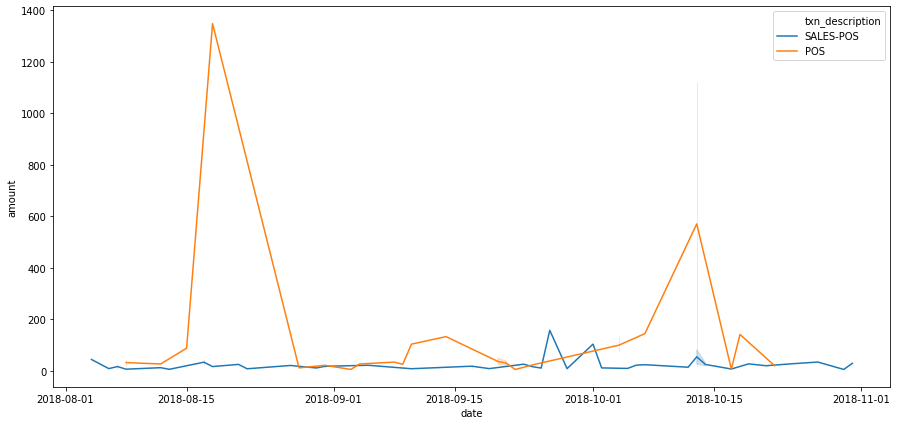

In [768]:
fig, ax = plt.subplots(figsize=(15,7))
a = merchant_state_grp.get_group('ACT').agg({'amount': np.array,'movement':np.array,'date':np.array,'txn_description':np.array})
# a.plot(x='date',y='amount')
sns.lineplot(data= a, x='date',y='amount',hue='txn_description')


In [769]:
state_list = df['merchant_state'].unique()

index = 2
state_list = np.delete(state_list,index)
state_list

array(['QLD', 'NSW', 'VIC', 'WA', 'SA', 'NT', 'TAS', 'ACT'], dtype=object)

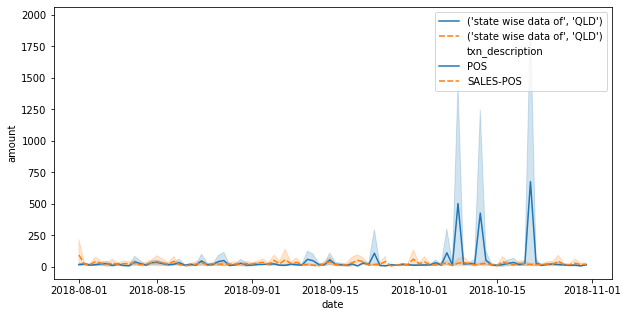

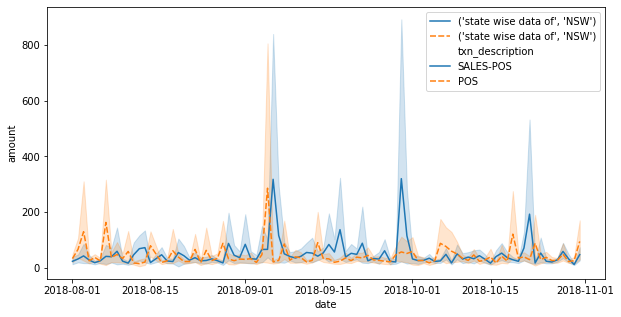

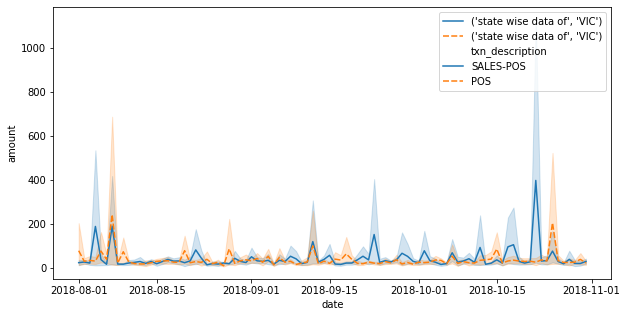

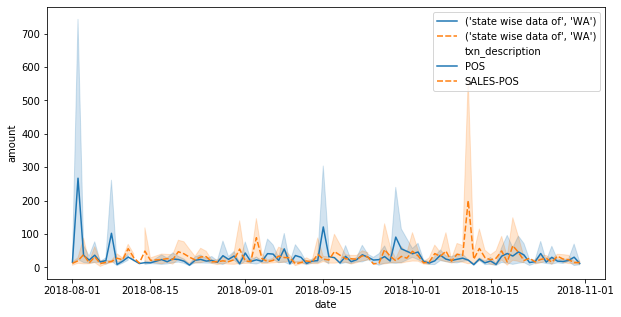

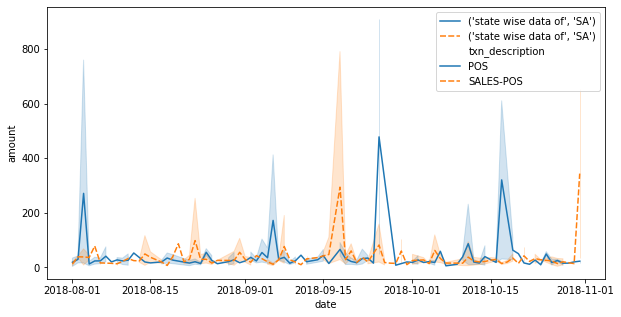

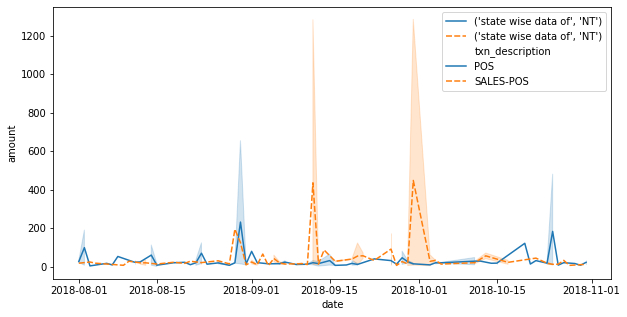

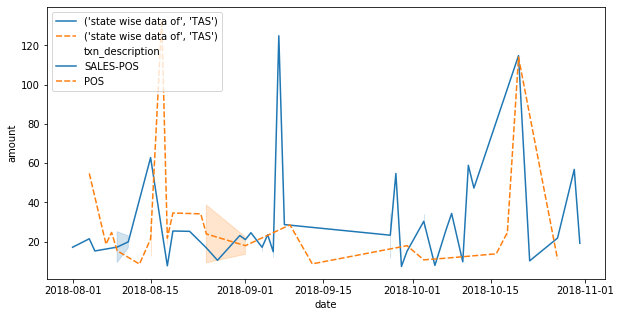

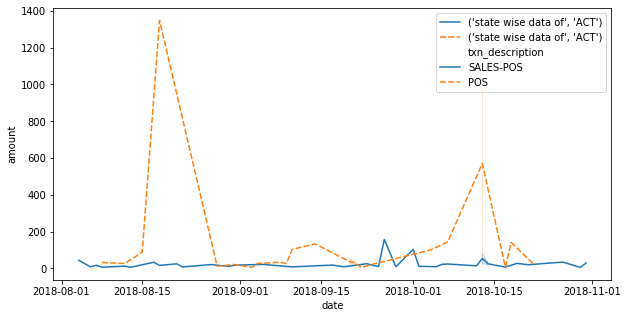

In [770]:
for i in state_list:
    fig, ax = plt.subplots(figsize=(10,5))
    a = merchant_state_grp.get_group(i).agg({'amount': np.array,'movement':np.array,'date':np.array,'txn_description':np.array})
    # a.plot(x='date',y='amount')
    sns.lineplot(data= a, x='date',y='amount',hue='txn_description',style='txn_description',label=('state wise data of',i))
    

### please scroll the above shown graph for better understanding of transaction per date in respective state

In [221]:
# fig, ax = plt.subplots(figsize=(18,1))
# plt.figure(figuresize = (12,8))

# sns.heatmap(df.isnull(),ax=ax)


In [771]:
aug_date = df.loc[(df['date'] < '2018-09-01') & (df['date']>'2018-08-01'),['date','status','txn_description' ]]
# aug_date.head(5)

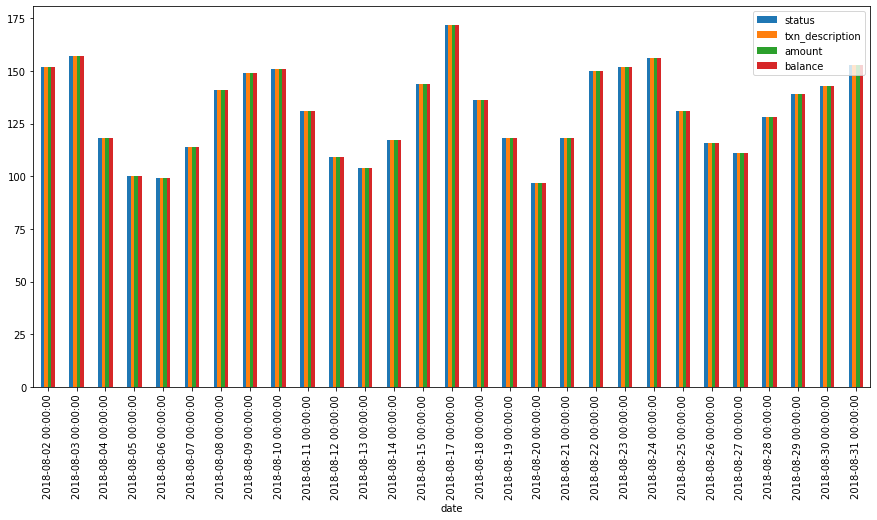

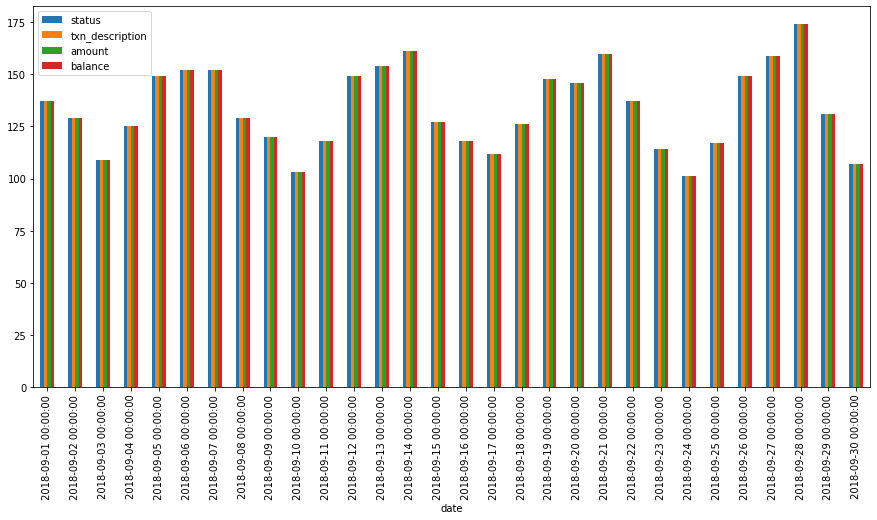

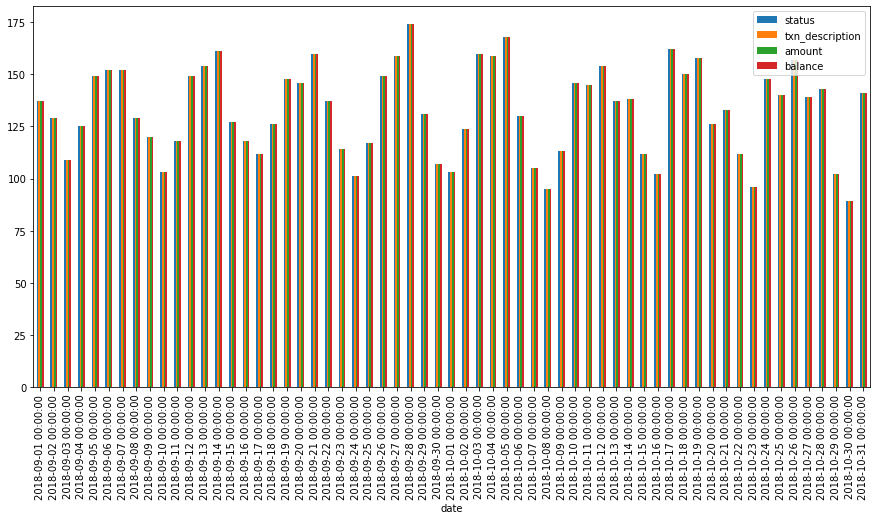

In [773]:
month_list = [aug_data,sep_data,oct_data]
for data in month_list:
    data.groupby(data['date']).count().plot(kind="bar",figsize=(15,7))


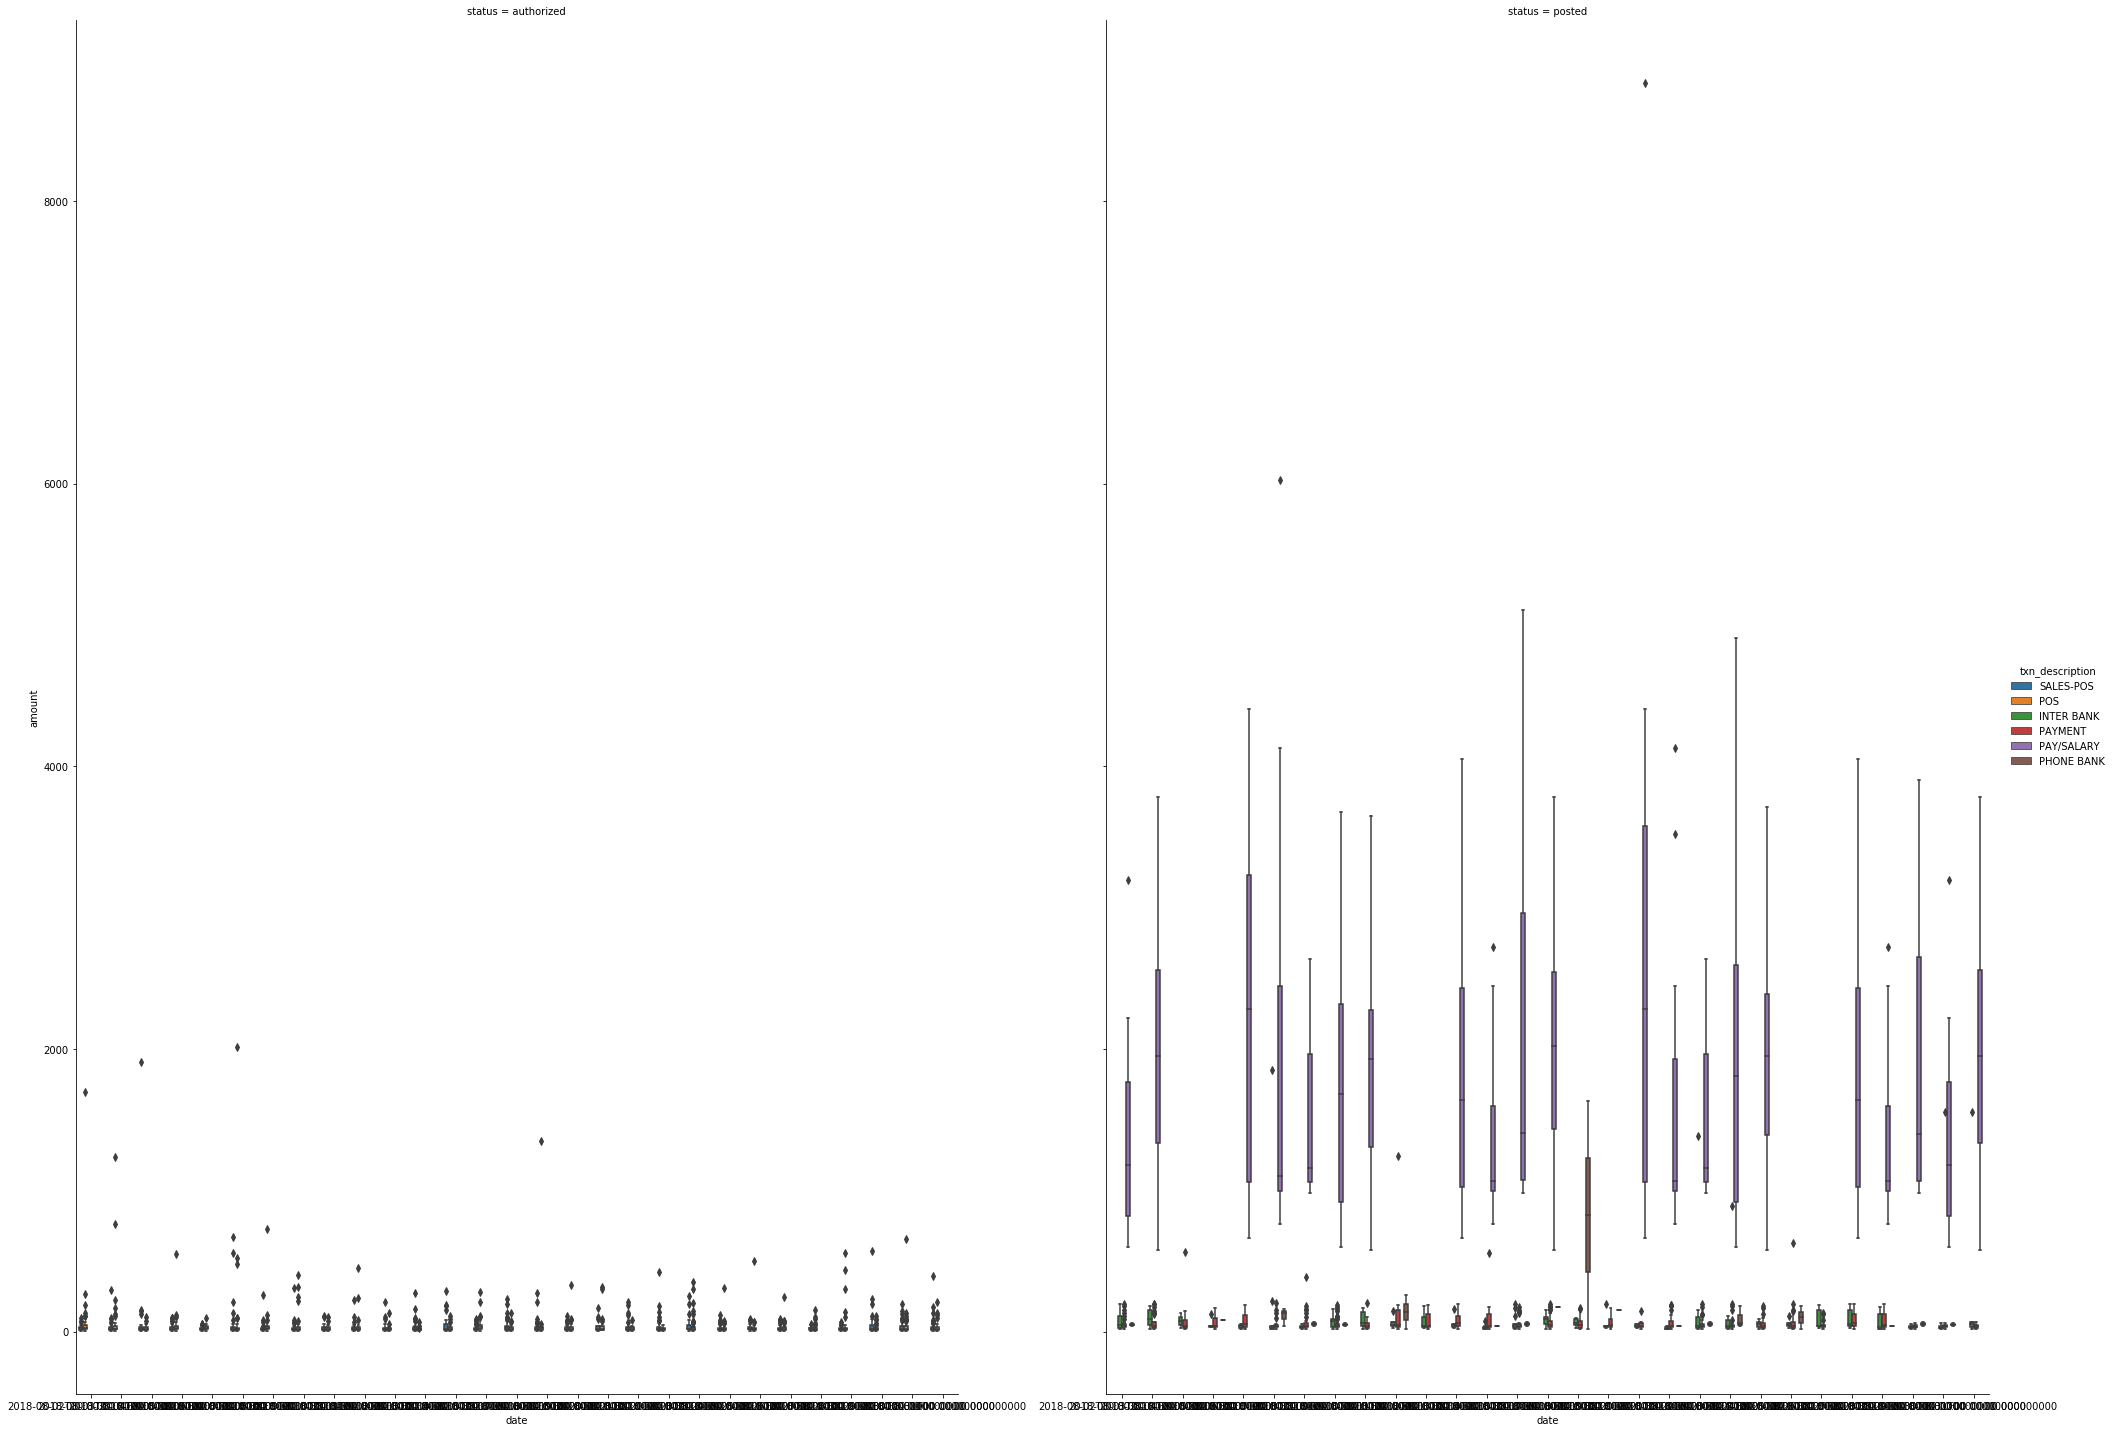

In [774]:
g = sns.catplot(x="date", y="amount",
                hue="txn_description", col="status",
                data=aug_data, kind="box",
                height=20, aspect=.7);
g

#### insights are not much visible in aboive plot

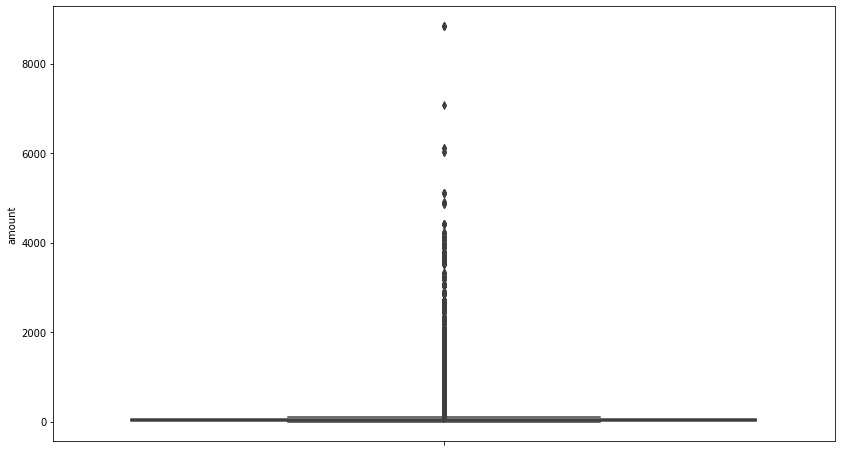

In [775]:
fig,ax = plt.subplots(figsize=(14,8))
sns.boxplot(y='amount',data=df,ax=ax)

### <font color=teal >  <em>Checking the distrbution of AMOUNT </em></font>

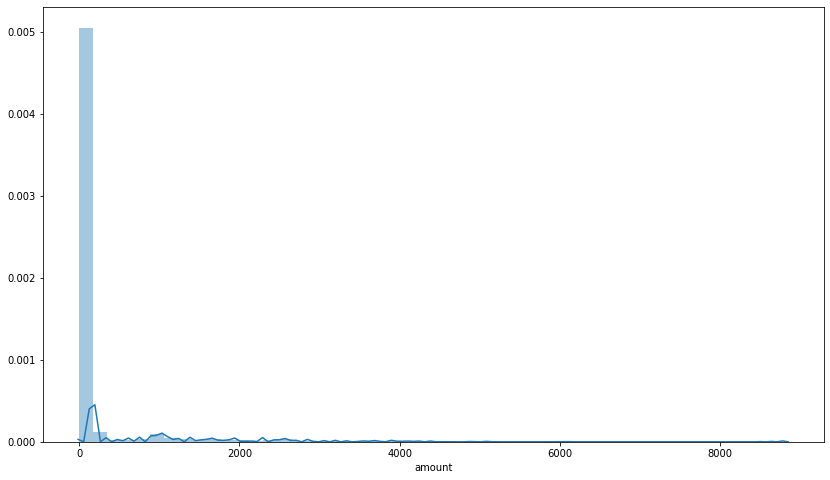

In [776]:
fig,ax = plt.subplots(figsize=(14,8))
sns.distplot(df['amount'])

### <font color=teal > <em>trying to make normal distrbution </em></font>

In [777]:
from scipy import stats

In [778]:
df['amount'].skew()

5.356266394770427

In [779]:

newnew = stats.boxcox(df['amount'])[0]
pd.Series(newnew).skew()

-0.273441453684392

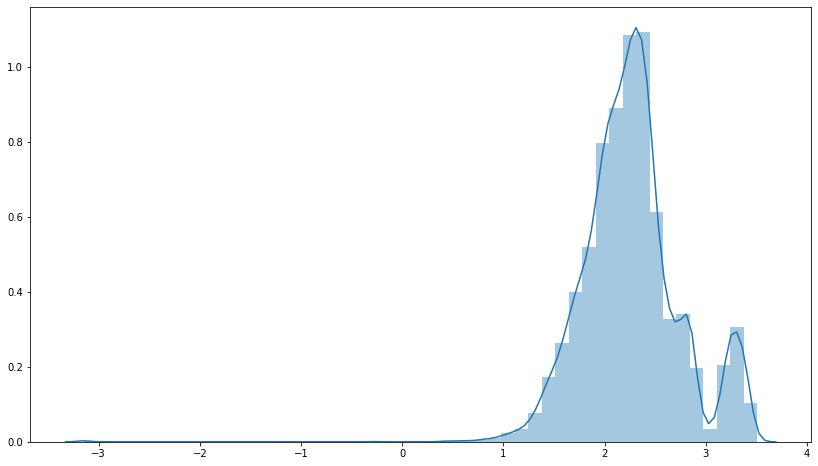

In [780]:
fig,ax = plt.subplots(figsize=(14,8))
sns.distplot(newnew)

In [781]:
newnewnew = np.log(df['amount'])
newnewnew.skew()

1.4091072595935499

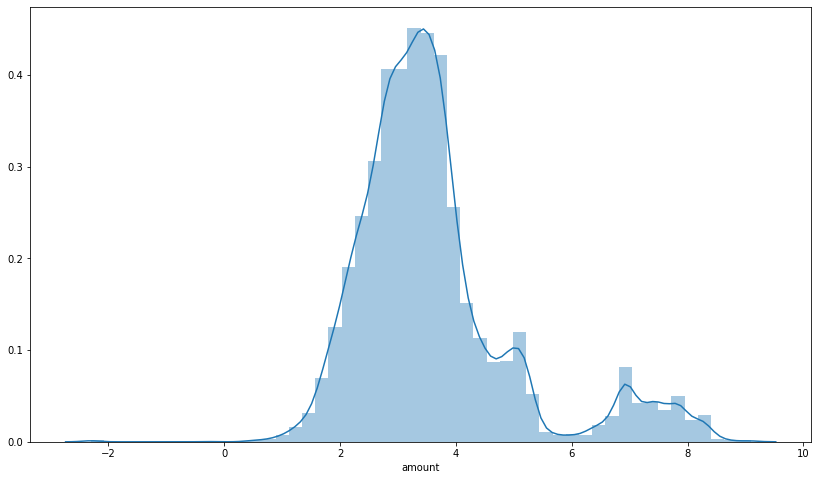

In [782]:
fig,ax = plt.subplots(figsize=(14,8))
sns.distplot(newnewnew)

### <font color=teal> checking Null Values </font>

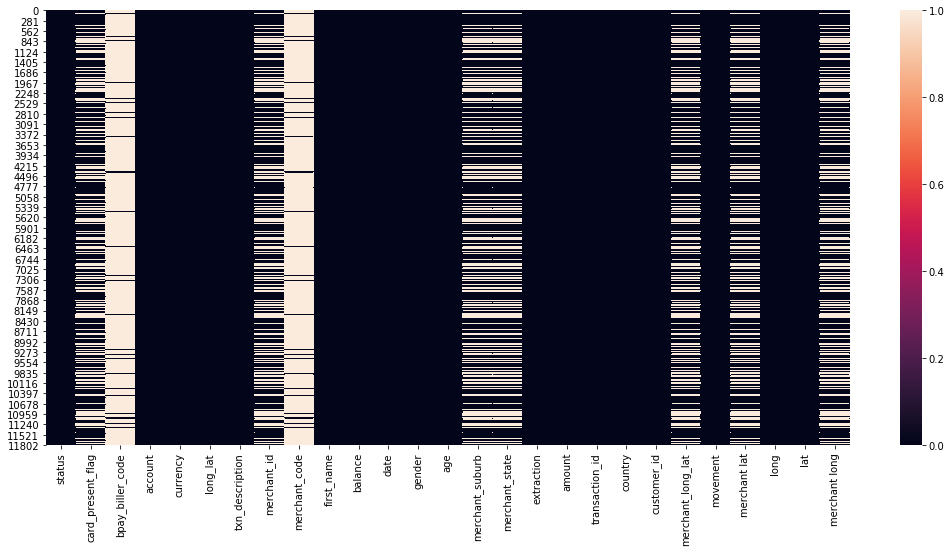

In [783]:
plt.figure(figsize=(18,8))

sns.heatmap(df.isnull())

## <font color=orangered >For Further PreProcessing We Can Treat Null Values </font>